<a href="https://colab.research.google.com/github/syeong1218/python/blob/master/Final_Report_Team_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

조원 : 17101595 유순영, 14108307 구교훈, 15108382 임영준

# **Ⅰ. SMILES(Simplified Molecular Input Line Entry System)**
## **1. SMILES의 정의**
SMILES(Simplified Molecular Input Line Entry System)은 화학물질의 구조를 짧은 ASCII를 이용하여 문자열로 나타내는 방법입니다. 즉, 화학정보학을 위해 2차원, 3차원의 구조를 가진 분자와 화학반응을 문자열로 표기한 간단한 화학 언어입니다. 그래서 적은 양의 데이터를 이용하여 화학물질을 나타낼 수 있습니다.

RDkit는 화학정보학을 위한 Open-source module로 이를 다운받아야 SMILES를 사용할 수 있다. 코랩에서 아래 코드를 실행시키면 됩니다.



#### RDkit 다운코드

In [0]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2019-12-14 04:50:09--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71785000 (68M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  68.46M   210MB/s    in 0.3s    

2019-12-14 04:50:09 (210 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [71785000/71785000]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

#### RDkit import

In [0]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

위의 Draw는 Python에서 SMILES로 표현한 화학물질을 Output에서 그림으로 출력하게 하는 함수입니다. Draw 함수를 import하지 않으면 SMILES의 저장 위치가 출력됩니다. 그래서 
밑에서 두 번째까지의 코드를 default 하겠습니다. 또한 화학적으로 불가능한 화합물의 경우 출력이 되지 않습니다.

**SMILES의 활용 분야**
  - 데이터베이스 접근의 키
  - 연구자들의 화학정보 변환 메커니즘
  - 화학 데이터 입력 시스템
  - 화학 시스템이나 AI를 위한 언어

## **2. 정규화(Canonicalization)**
분자를 묘사하기 위한 2차원의 그림입니다. 원자와 결합에 대해서만  나타낸 SMILES을 'generic SMILES'라고 합니다. 일반적으로 하나의 화학물질에 대해 결과값은 동일하지만 다양한 SMILES로 입력할 수 있습니다.

In [0]:
a = Chem.MolFromSmiles('OCN')

In [0]:
Chem.MolToSmiles(Chem.MolFromSmiles('OCN'))

'NCO'

In [0]:
Chem.MolToSmiles(Chem.MolFromSmiles('N-C-O'))

'NCO'

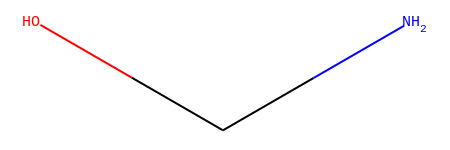

In [0]:
a

SMILES를 다르게 입력하더라도 결과값은 동일합니다.


따라서 어떤 SMILES 을 입력하더라도 유일하게 자체적으로 하나의 SMILES으로 처리하는 것을 ‘unique SMILES'이라 하고 이를 형성하기 위한 알고리즘이 존재합니다.
동위원소, 카이랄을 표현하기위한 SMILES를 'isomeric SMILES'이라 합니다. unique SMILES와 isomeric SMILES가 합해진 형태를 'absolute SMILES'이라 합니다.

일반적으로 주어진 구조를 나타내는 SMILES구조가 많이 있는데, 모든 유효한 가능성 중에서 하나의 특별한 일반 SMILES를 생성하기 위해 canonical 알고리즘이 존재합니다. 이 특별한 SMILES는 "unique SMILES"로 알려져 있습니다. 일반적인 규칙을 따르는 form을 canonical form이라고 생각할 수 있습니다.



## **3. SMILES 규칙(SMILES Sepcification Rules)**
- SMILES는 띄어쓰기를 사용하지 않고 원자들을 일렬로 나열하여 표현합니다.
- 수소원자는 생략하거나, 포함해도 됩니다.
- 방향족 물질들은 직관적으로 명시하거나 Kekulé form으로 분류할 수 있습니다.
- 대표적으로 5가지의 규칙이 있습니다. 
  1. 원자(atom) 
  2. 결합(bond)
  3. 가지(branch)
  4. 고리닫힘(ring closure)
  5. 단절(disconnection) 

### **3.1 원자(atom)** 

- 수소를 포함하지 않는 단일원자는 [ ]사용합니다.organic subset는 [ ] 없이 쓰이기도 합니다.

- 최소 원자가 전자를 갖는다고 인식합니다.

      B (3), C (4), N (3,5), O (2), P (3,5), S (2,4,6), 할로겐족(1)

- 지방족 탄소는 대문자 'C' 로, 방향족 탄소는 'c'로 명시합니다.

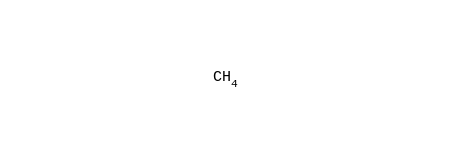

In [0]:
a = Chem.MolFromSmiles('C') # 수소를 생략해도 출력값에 포함됩니다.
a

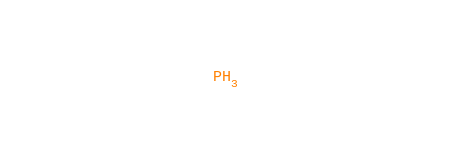

In [0]:
a = Chem.MolFromSmiles('P')
a

- '$[]$'속의 수소와 형식전하는 반드시 명시되어야 합니다. - 결합된 수소의 수는 H 와 숫자로 표현됩니다.
- 형식전하는 + 혹은 - 로 표시되어야 합니다. 명시되어 있지 않으면 전하는 0으로 가정합니다.
$[Fe++] = [Fe+2]$

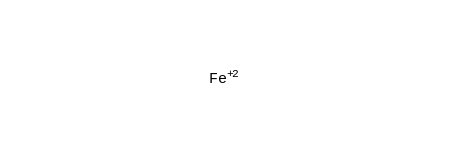

In [0]:
a = Chem.MolFromSmiles('[Fe++]')
a

### **3.2 결합(Bonds)**
- 단일 결합은 생략하거나 '-'기호를 사용합니다.
- 이중 결합은 '='기호를 사용합니다.
- 삼중 결합은 '#'기호를 사용합니다.
- 방향족 결합은 생락하거나 ':'기호를 사용합니다.

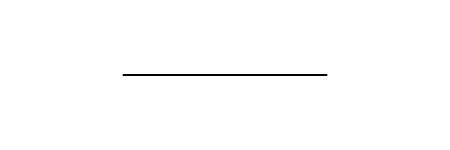

In [0]:
a  = Chem.MolFromSmiles('CC')
a

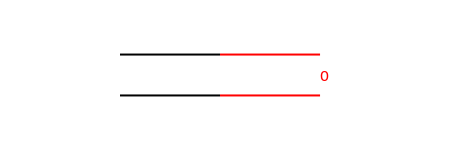

In [0]:
a = Chem.MolFromSmiles('O=C')
a

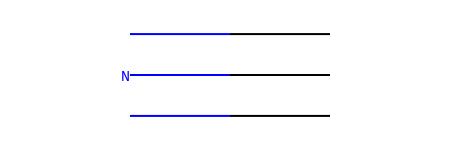

In [0]:
a = Chem.MolFromSmiles('C#N') 
a

이와 같은 규칙을 이용하여 6-hydroxy-1,4-hexadiene을 표현해보면

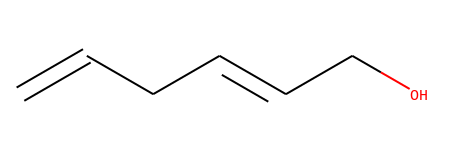

In [0]:
a = Chem.MolFromSmiles('C=CCC=CCO')
a

### **3.3 가지(Branches ; 치환기, 알킬기)**
- 가지들은 중첩되거나 쌓일 수 있으며, 소괄호`()`로 묶어 결합 원소의 오른쪽에 써줍니다.

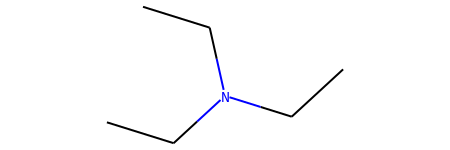

In [0]:
Triethylamine = Chem.MolFromSmiles('CCN(CC)CC') 
Triethylamine

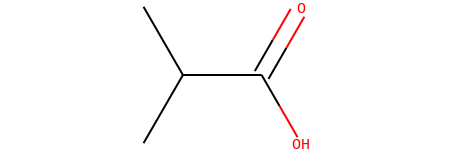

In [0]:
Isobutyric_acid = Chem.MolFromSmiles('CC(C)C(=O)O')
Isobutyric_acid

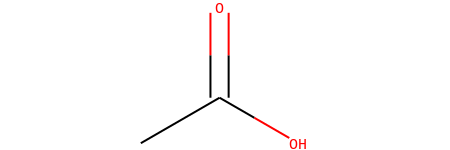

In [0]:
acetic_acid = Chem.MolFromSmiles('CC(=O)O')
acetic_acid

### **3.4 고리구조(Cyclic Structures)**
- 고리형 구조는 고리에서 하나의 결합을 끊어 선형적으로 표시하고, 결합을 끊은 원자 바로 뒤에 숫자를 이용해 고리형 구조를 표현합니다.

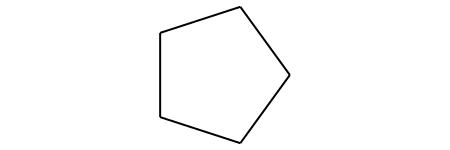

In [0]:
cyclopentane = Chem.MolFromSmiles('C1CCCC1')
cyclopentane

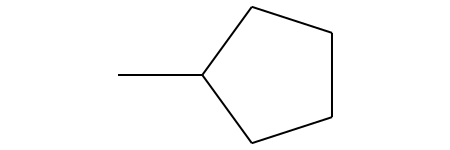

In [0]:
m = Chem.MolFromSmiles('C1CCC(C)C1')
m

- 동일한 화학물을 여러 방법으로 표현할 수 있고, 한 가지 분자의 다양한 표현은 우선순위가 없습니다.

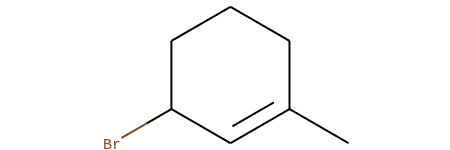

In [0]:
mbc1 = Chem.MolFromSmiles('CC1=CC(Br)CCC1')
mbc1

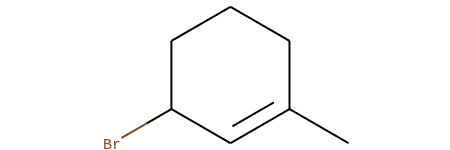

In [0]:
mbc2 = Chem.MolFromSmiles('CC1=CC(CCC1)Br')
mbc2

- 한 원자는 하나 이상의 `ring closure`을 가질 수 있습니다. 아래와 같은구조로 설명할 수 있습니다.

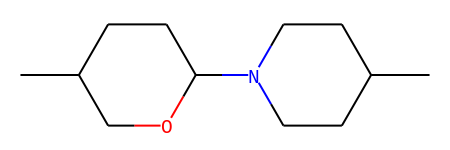

In [0]:
m = Chem.MolFromSmiles('O1CC(C)CCC1N1CCC(C)CC1')
m

### **3.5 비결합 구조(Disconnected Structures)**
- 연결되지 않은 혼합물은 ' . '을 사용하여 각각의 구조들을 분리시킵니다.
- 이온 혹은 리간드(ligands)의 연결은 순서에 상관없이 사용가능합니다. 한 전하가 다른 전하로의 연결을 의미하는 것도 아니고, 알짜 전하를 반드시 0으로 가질 필요도 없스니다.
- 필요에 따라, 한 이온의 SMILES이 sodium phenoxide(석탄산나트륨)와 같이 다른 이온에 삽입될 수 있습니다.



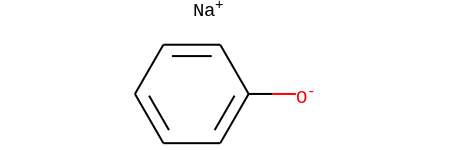

In [0]:
m = Chem.MolFromSmiles('[Na+].[O-]c1ccccc1')
m

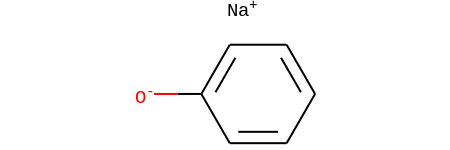

In [0]:
m = Chem.MolFromSmiles('c1cc([O-].[Na+])ccc1')
m

- 원자 명시에 따른 자릿수가 같은 쌍은 서로 결합됨을 의미합니다.

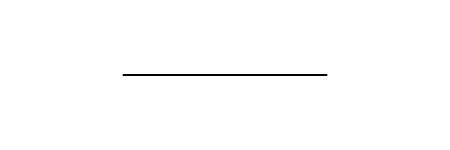

In [0]:
C_C = Chem.MolFromSmiles('C1.C1')
C_C

## **4. 이성질체 SMILES(Isomeric SMILES)**

- 동위원소, 이중결합의 구조, 카이랄성을 규정합니다.
- IUPAC 명명법과 CIP 명명법과는 다르게 카이랄성을 명명합니다.
- 모든 화합물의 카이랄성이 알려져 있지는 않기 때문에, 가능한 카이랄성만을 표기합니다.


### **4.1 동위원소(Isotopic Specification)**
- 동위원소는 [원자량 + 원자기호] 로 표기합니다.

SMILES | Name
---- | ----
$[12C]$ | carbon-12
$[13C]$ | carbon-13
$[C]$ | carbon(unspecified mass)
$[13CH4]$ | C-13 methane

### **4.2 이중결합 배치(Configuration Around Double Bonds)**
- 이중결합의 구조 이성질체는 결합의 방향을 나타내며 '/'와'\'로 명시합니다.
- '/'와'\'는 결합된 원자들 간의 상대적인 위치를 나타내는 것으로, 이중결합으로 연결될 때에만 의미를 갖습니다.

>**E,Z체계**<br>
E(entgegon) : 반대편이라는 어원, 높은 우선순위를 갖는 탄소가 포함된 치환기가 이중결합의 **반대 위치**에 존재할 경우(≒trans-)<br>
Z(zusammen) : 함께라는 어원, 높은 우선순위를 갖는 탄소가 포함된 치환기가 이중결합의 **같은 위치**에 존재할 경우(≒cis-)<br>
Ex) E- and Z-1,2-dibromoethene


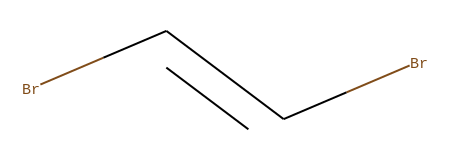

In [0]:
E1 = Chem.MolFromSmiles('Br/C=C/Br') # 이중결합 왼쪽과 오른쪽의 슬래쉬가 방향이 같으면 E 방향입니다.
E1

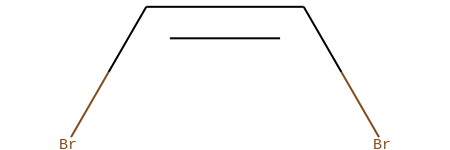

In [0]:
E2 = Chem.MolFromSmiles('Br/C=C\Br') # 이중결합 왼쪽과 오른쪽의 슬래쉬가 방향이 반대면 Z 방향입니다.
E2

- SMILES과 CIP의 카이랄표현의 차이점은 SMILES은 국부적인 카이랄성(local chirality)를 표현할 수 있다는 점입니다.

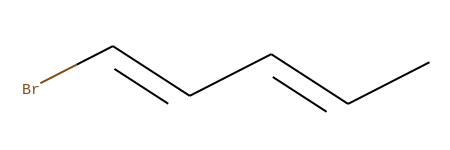

In [0]:
S1 = Chem.MolFromSmiles('Br/C=C/C=C/C')
S1

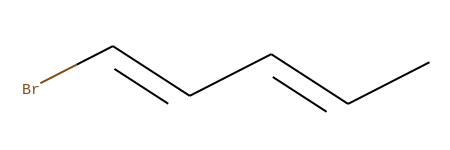

In [0]:
S2 = Chem.MolFromSmiles('Br/C=C/C=CC')
S2

### **4.3 사면체의 중심의 구조(Configuration Around Tetrahedral Centers)**
* SMILES은 국부적 카이랄성을 기반으로한 가장 일반적인 형식의 명시법을 사용합니다.
* SMILES에서 사면체의 중심은 카이랄 원자의 원자 기호에 카이랄이라는 명시(@ 혹은 @@)를 합니다. '@'는 이웃하는 원자들이 반시계로 표현되어 있다는 것을 의미하고 '@@'는 이웃하는 원자들이 시계로 표현되어 있다는 것을 의미합니다.
* **카이랄성(Chirality):**<br>
거울상에 포갤 수 없는 분자를 카이랄(chiral)이라 합니다.<br>
같은 분자식이라 하여도 입체구조에 의해 서로 다른 화합물입니다. 이를 입체 이성질체라고 합니다. <br>
카이랄성의 가장 일반적인 원인은 네 개의 서로 다른 치환기가 결합된 탄소에서 가장 많이 볼 수 있는 정사면체인 원자 때문입니다.<br>
네 개의 서로 다른 치환기체가 결합된 탄소 원자는 두 개의 주요 대칭 요소가 없고 **카이랄 중심(chiral center)**라 불립니다.<br> Ex) 1-Bromo-1-chloro-1-fluoromethane : C에 -Cl, -H, -F, -Br이 결합된 카이랄 중심입니다.<br>
![chiral](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Chiral.svg/300px-Chiral.svg.png)<br>
(사진출처:위키피디아)

* **카이랄 중심의 R or S 배열 결정**<BR> 카이랄 중심을 정하고 4개의 치환기를 확인한 후, 우선순위가 가장 높은 것(1)부터 가장 낮은 것(4)까지 번호를 배정합니다.

    ```
    우선순위
    카이랄 중심에서 결합된 원자의 번호가 클수록 높은 우선순위 
    -> 비교가 안된다면 두 번째 쌍을 살펴봅니다 
    -> 이중 결합의 경우 결합과 같은 수만큼의 '가상'의 원자들이 단일 결합으로 취급
    ```

  가장 낮은 우선순위(4)를 갖는 치환기를 자동차의 운전대 기둥처럼 자신으로 부터 가장 멀리 위치하도록 분자를 배치합니다.<br>
자신쪽으로 향하고 있는 세 개의 치환기들을 우선순위가 가장 높은(1)치환기 부터 우선순위가 가장 낮은(3) 치환기 순서대로 읽습니다.<br>
치환기가 시계방향이면 배열을 R(라틴어 rectus,똑바른, 올바른); SMILES에선 @@, 반시계 방향이라면 S(라틴어 sinister, 왼쪽); SMILES에선 @로 합니다.

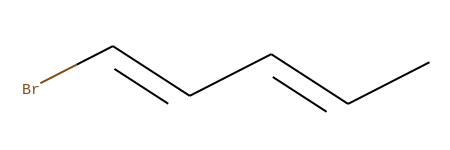

In [0]:
bS1 = Chem.MolFromSmiles('NC(C)(F)C(=O)O')
S1

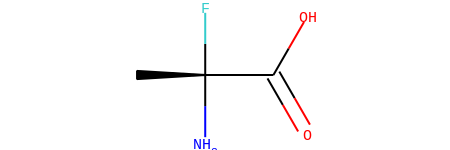

In [0]:
m = Chem.MolFromSmiles('N[C@](C)(F)C(=O)O')
m

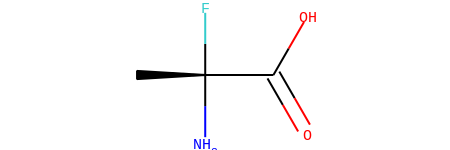

In [0]:
m = Chem.MolFromSmiles('N[C@@](F)(C)C(=O)O')
m

In [0]:
m.HasSubstructMatch(Chem.MolFromSmiles('F[C@](N)(C)C(=O)O'),useChirality=True) # 이 둘의 구조가 같은지 확인

True

### **4.4 일반적인 카이랄 규칙(General Chiral Sepcification)**

* 많은 종류의 카이랄성이 존재하며, '@'기호를 사용함으로써 카이랄을 나타냈습니다.
* SMILES에서 사용하는 일반적 카이랄 규격은 3부분이 있습니다:
  1. '@'기호
  2. 잇따르는 두 글자의 카이랄 표시
  3. 잇따르는 수치해석적인 카이랄 지정자
* 가장 기초가 되는 카이랄 class는 각각의 degree(연결의 수)입니다.
       4개의 연결에 기초가 되는 class는 사면체(TH)입니다.
* 대부분의 경우 @1표시는 SMILES의 순서를 기준으로 한 축에 반시계 방향으로 @2표시는 시계방향을 의미합니다.
* '@@'와 '@@@'는 각각 '@2','@3'와 같습니다.
* 위에서 사용된 '@'와 '@@'는 '@TH1'과 '@TH2'를 간략하게 표현한 것입니다.
* SMILES은 모든 범위에 관한 카이랄 규격을 다룹니다.('감소된 카이랄성', '퇴화된 카이랄성') 따라서 정확하게 알고 있는 모든 것을 보장하는 언어입니다.
* 이 섹션의 마지막 부분에선 사면체, 알렌식(allen-like), 사각평면, trigonal-bypyramidal, octahedral의 카이랄성에 제한될 것입니다. 비록 많은 카이랄성은 위의 체계로 다룰 수 있겠지만, 이러한 5개의 클래스는 화학에서 매우 흔하고, 자주 다뤄지는 부분입다.

* Tetrahedral:TH라는 기호로 표시되며, 4방위가 붙어있는 카이랄 클래스의 default입니다.

* Allen-like:AL의 기호로 표시되며, 카이랄 중심이 이중결합으로 연결된 2개가 붙어있는 카이랄 클래스의 default입니다. 비록 C=C=C의 구조가 가장 흔하나, C=C=C=C=C 구조들도 또한 allen-like입니다. 이중결합된 원자가 일렬로 짝수개가 연결된 것입니다.

![AL](http://www.daylight.com/dayhtml/doc/theory/theory18.gif) | ![substituted](http://www.daylight.com/dayhtml/doc/theory/theory19.gif)
---- | ----
OC(Cl)=$[C@]$=C(C)F | OC=$[C@]$=CF
OC(Cl)=$[C@AL1]$=C(C)F | OC($[H]$)=$[C@AL1]$=C($[H]$)F

In [0]:
m = Chem.MolFromSmiles('OC(Cl)=[C@]=C(C)F')
m.HasSubstructMatch(Chem.MolFromSmiles('OC(Cl)=[C@@]=C(F)C'),useChirality=True) # 카이랄성이 일치하는지 확인

True

* 사각평면 : SP 기호로 표시
@SP1,@SP2, @SP3; 4방위가 연결된 카이랄 class의 default는 아니고, 줄이는 표현 또한 없습니다. 또한 시계와 반시계방향이 없는 점이 특징입니다.

![SP](http://www.daylight.com/dayhtml/doc/theory/theory20.gif) | -
---- | ----
F$[Po@SP1]$(Cl)(Br)I | (SP1 lists in a "U shape")
F$[Po@SP2]$(Br)(Cl)I | (SP2 lists in a "4-shape")
F$[Po@SP3]$(Cl)(I)Br | (SP3 lists in a "Z shape")

* Trigonal-bipyramidal : TB기호로 사용합니다. 5개의 방향의 카이랄 class의 default입니다.

  ![TB](http://www.daylight.com/dayhtml/doc/theory/theory21.gif)


In [0]:
m = Chem.MolFromSmiles('S[As@@](F)(Cl)(Br)C=O')
m.HasSubstructMatch(Chem.MolFromSmiles('O=C[As@](Cl)(Br)(F)S'),useChirality=True)

True

In [0]:
m.HasSubstructMatch(Chem.MolFromSmiles('O=C[As@](F)(Cl)(Br)S'),useChirality=True)

True

* *Octahedral* : OH기호로 사용. 6개의 방향의 카이랄 class의 default입니다.

  가능한 값은 @OH1~ @OH2 : @OH1(or @)는 한 개의 축이 다른 것과 연결을 SMILE에 의해 나열될 때, 4개의 중간, 수평적으로 연결된 원자들을 시계방향으로 나열시킨 것.@OH2(or @@)는 시계방향입니다.
</br>![OH](http://www.daylight.com/dayhtml/doc/theory/theory22.gif)


## **5. SMILES의 관례(MILES Convention)**



### **5.1 Hydrogens**

수소 원자는 대부분 생략됩니다.
일반적으로 3가지 방법으로 수소 원자를 표시합니다.
 - 암시적 표시 : '[',     ']' 으로 표시되지 않은 원자가 원소들
 - 명확한 표시 : '[',     ']' 안에 정확한 갯수와 함께 표시
 - 하나의 수소 원자 : [H]
 
그리고 반드시 수소원자를 명확히 표시해야할 때가 있습니다.
 - 전하를 띄는 수소 : [H+]
 - 수소 분자 : [H][H]
 - 하나 이상의 다른 원자에 연결된 수소 : bridging hydrogens
 - 동위원소 수소  : heavy water [2H]O[2H]


RDKit WARNING: [10:53:40] WARNING: not removing hydrogen atom without neighbors


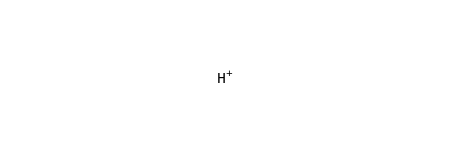

In [0]:
m = Chem.MolFromSmiles('[H+]')
m

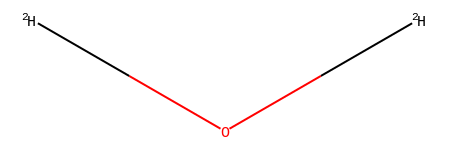

In [0]:
heavywater = Chem.MolFromSmiles('[2H]O[2H]')
heavywater

### 5.2  **방향족(Aromaticity)**

- 분자의 대칭성을 특징짓기 위해서 SMILES 같은 시스템에서 명확한 명명법을 생성할 수 있어야합니다. <br>
- 정확한 방향족 판단 알고리즘이 있는 경우에, 사용자가 지방족 구조를 입력하고 싶을때 방향족 구조식으로 입력할 필요가 없습니다.<br>
- 원하는 화합물을 짧게 명시할 수 있다.

SMILES은 Hueckel 규칙의 확장 된 버전을 사용하여 방향족 분자와 이온을 식별합니다.

> Hueckel's Rule
> 1. 분자는 고리를 가져야합니다.
> 2. 고리의 모든 원자는 같은 평면에 있어야합니다.
> 3. 고리의 모든 원자는 **fully conjugated** 이어야합니다.(모든 원자가 p 오비탈을 가진다.)
> 4. 분자는 (4n+2)개의 $\pi$ 전자를 가집니다. ( n은 0 보다 크거나 같은 정수 ) <br>
=> 4번만 만족하지 않는 화합물을 **antiaromatic** 이라고 합니다.



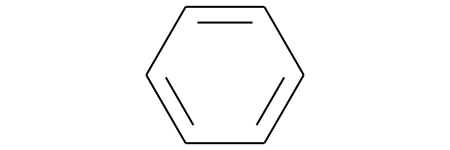

In [0]:
H = Chem.MolFromSmiles('c1ccccc1') # Aromatic
H

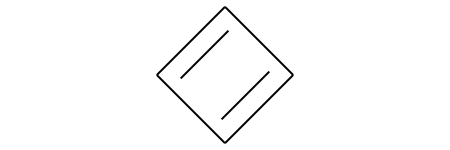

In [0]:
H = Chem.MolFromSmiles('c1ccc1') # Aromatic
H

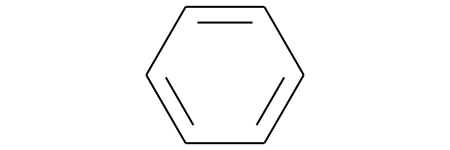

In [0]:
K = Chem.MolFromSmiles('C1=CC=CC=C1') # Aliphatic
K

# **Ⅱ. 시퀀스-투-시퀀스 (Sequencd-to-Sequence, seq2seq)**


시퀀스-투-시퀀스(Sequence-to-Sequence)는 입력된 시퀀스로부터 다른 도메인의 시퀀스를 출력하는 다양한 분야에서 사용되는 모델입니다. 대표적으로 챗봇(Chatbot)과 기계 번역(Machine Translation)이 있습니다.  입력 시퀀스와 출력 시퀀스를 각각 질문과 대답으로 구성하면 챗봇으로 만들 수 있고, 입력 시퀀스와 출력 시퀀스를 각각 입력 문장과 번역 문장으로 만들면 번역기로 만들 수 있습니다. 따라서 seq2seq에 대한 구조를 이해하고, 케라스(keras)를 통해 직접 구현해보겠습니다.

## **1. 시퀀스 - 투 - 시퀀스  (Sequence-to-Sequence)**

![대체 텍스트](https://wikidocs.net/images/page/24996/%EC%8B%9C%ED%80%80%EC%8A%A4%ED%88%AC%EC%8B%9C%ED%80%80%EC%8A%A4.PNG)

위의 그림은 seq2seq 모델로 만들어진 번역기가 'I am a student'라는 영어 문장을 입력받아서, 'je suis étudiant'라는 프랑스 문장을 출력하는 모습을 보여줍니다. Seq2Seq의 장점은 전체 input을 훑어본 뒤에 임의의 어떤 시퀀스를 출력할 수 있으며, 효율적인 번역을 위해 input의 특정 부분만을 집중하여 살펴볼 수도 있습니다. Seq2Seq의 한계는 시퀀스의 입력과 출력 길이에 어떠한 제약도 없다는 것이지만, Seq2Seq 모델은 LSTM의 한계때문에 입력 문장이 매우 길면 효율적으로 학습하지 못합니다.

![대체 텍스트](https://wikidocs.net/images/page/24996/seq2seq%EB%AA%A8%EB%8D%B811.PNG)

seq2seq는 크게 입력을 context vector로 변화하는 인코더와 context vector을 원래의 정보로 출력하는 디코더로 구성되어 있습니다. 인코더와 디코더는 각각 여러개의 LSTM 셀로 구성되어 있습니다.

![대체 텍스트](https://wikidocs.net/images/page/24996/%EC%9D%B8%EC%BD%94%EB%8D%94%EB%94%94%EC%BD%94%EB%8D%94%EB%AA%A8%EB%8D%B8.PNG)

## **2. 인코더**
인코더는 입력 문장을 받는 LSTM 셀입니다.
인코더는 입력 문장의 모든 단어들을 순차적으로 입력받은 뒤에 마지막에 이 모든 단어 정보들을 압축해서 하나의 벡터로 만드는데, 이를 context vector라고 합니다. 입력 문장의 정보가 하나의 context vector로 모두 압축되면 인코더는 context vector를 디코더로 전송합니다. 

![대체 텍스트](https://wikidocs.net/images/page/24996/rnn%EA%B7%BC%ED%99%A9.PNG)

현재 시점(time step)을 t라고 할 때, LSTM 셀은 t-1에서의 은닉 상태와 t에서의 입력 벡터를 입력으로 받고, t에서의 은닉 상태를 만듭니다. 이때 t에서의 은닉 상태는 바로 위에 또 다른 은닉층이나 출력층이 존재할 경우에는 위의 층으로 보내거나, 필요없으면 값을 무시할 수 있습니다. 그리고 LSTM 셀은 다음 시점에 해당하는 t+1의 LSTMN 셀의 입력으로 현재 t에서의 은닉 상태를 입력으로 보냅니다.

이런 구조에서 현재 시점 t에서의 은닉 상태는 과거 시점의 동일한 LSTM 셀에서의 모든 은닉 상태의 값들의 영향을 누적해서 받아온 값이라고 할 수 있습니다. 그렇기 때문에 앞서 언급했던 context vector는 사실 인코더에서의 마지막 LSTM 셀의 은닉 상태 값을 말하는 것이며, 이는 입력 문장의 모든 단어 토큰들의 정보를 요약해서 담고있다고 할 수 있습니다. 그리고 이 context vector는 디코더의 LSTM 셀의 첫 번째 은닉 상태로 사용됩니다.

## **3. 디코더**
디코더는 출력 문장을 출력하는 LSTM 셀입니다.
디코더는 인코더의 마지막 LSTM 셀의 은닉 상태인 context vector를 첫번째 은닉 상태의 값으로 사용합니다. 디코더는 초기 입력으로 문장의 시작을 의미하는 심볼 <sos>가 들어갑니다. 디코더의 첫번째 LSTM 셀은 이 첫번째 은닉 상태의 값과, 현재 t에서의 입력값인 <sos>로부터, 다음에 등장할 단어를 예측합니다. 그리고 이 예측된 단어는 다음 시점인 t+1 LSTM에서의 입력값이 되고, 이 t+1에서의 LSTM 또한 이 입력값과 t에서의 은닉 상태로부터 t+1에서의 출력 벡터. 즉, 또 다시 다음에 등장할 단어를 예측하게 될 것입니다. 이런 식으로 기본적으로 다음에 올 단어를 예측하고, 그 예측한 단어를 다음 시점의 LSTM 셀의 입력으로 넣는 행위를 반복합니다. 이 행위는 문장의 끝을 의미하는 심볼인 <eos>가 다음 단어로 예측될 때까지 반복됩니다.

![대체 텍스트](https://wikidocs.net/images/page/24996/decodernextwordprediction.PNG)

출력 단어로 나올 수 있는 단어들은 다양한 단어들이 있습니다. seq2seq 모델은 선택될 수 있는 모든 단어들로부터 하나의 단어를 골라서 예측해야 합니다. 이를 예측하기 위해서 소프트맥스 함수를 사용합니다. 디코더에서 각 시점(time step)의 LSTM 셀에서 출력 벡터가 나오면, 해당 벡터는 소프트맥스 함수를 통해 출력 시퀀스의 각 단어별 확률값을 반환하고, 디코더는 출력 단어를 결정합니다.

## **4. 임베딩 층**
단어를 밀집 벡터로 만드는 작업을 워드 임베딩(word embedding)이라고 합니다. 밀집 벡터는 대부분의 값이 실수이고, 상대적으로 저차원입니다. 그리고 워드 임베딩 과정을 통해 나온 결과므로 임베딩 벡터(embedding vector)라고도 합니다. 원-핫 벡터의 차원이 주로 20,000 이상을 넘어가는 것과는 달리 임베딩 벡터는 주로 256, 512, 1024 등의 차원을 가집니다. 임베딩 벡터는 초기에는 랜덤값을 가지지만, 인공 신경망의 가중치가 학습되는 방법과 같은 방식으로 값이 학습되며 변경됩니다.

**Embedding()** : 단어를 밀집 벡터로 만드는 역할을 합니다. 인공 신경망 용어로는 임베딩 층(embedding layer)을 만드는 역할을 합니다. Embedding()은 정수 인코딩이 된 단어들을 입력을 받아서 임베딩을 수행합니다. 
Embedding(첫번째 인자,두번째 인자,input_length)에 넣어야하는 대표적인 인자는 다음과 같습니다.

>첫번째 인자 = 단어 집합의 크기. 즉, 총 단어의 개수<br>
두번째 인자 = 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기<br>
input_length = 입력 시퀀스의 길이

seq2seq에서 사용되는 모든 단어들은 워드 임베딩을 통해 임베딩 벡터로서 표현된 임베딩 벡터입니다. 아래 그림은 모든 단어에 대해서 임베딩 과정을 거치게 하는 단계인 임베딩 층(embedding layer)의 모습을 보여줍니다.

![대체 텍스트](https://wikidocs.net/images/page/24996/%EB%8B%A8%EC%96%B4%ED%86%A0%ED%81%B0%EB%93%A4%EC%9D%B4.PNG)

![대체 텍스트](https://wikidocs.net/images/page/24996/%EC%9E%84%EB%B2%A0%EB%94%A9%EB%B2%A1%ED%84%B0.PNG)

예를 들어 I, am, a, student라는 단어들에 대한 임베딩 벡터는 위와 같은 모습을 가집니다. 여기서는 그림으로 표현하고자 사이즈를 4로 하였지만, 보통 실제 임베딩 벡터는 수백 개의 차원을 가질 수 있습니다.

## **5. 교사 강요**
훈련 과정에서는 이전 시점의 디코더 셀의 출력을 현재 시점의 디코더 셀의 입력으로 넣어주지 않고, 이전 시점의 실제값을 현재 시점의 디코더 셀의 입력값으로 하는 방법을 사용할 겁니다. 그 이유는 이전 시점의 디코더 셀의 예측이 틀렸는데 이를 현재 시점의 디코더 셀의 입력으로 사용하면 현재 시점의 디코더 셀의 예측도 잘못될 가능성이 높고 이는 연쇄 작용으로 디코더 전체의 예측을 어렵게 합니다. 이런 상황이 반복되면 훈련 시간이 느려집니다. 만약 이 상황을 원하지 않는다면 이전 시점의 디코더 셀의 예측값 대신 실제값을 현재 시점의 디코더 셀의 입력으로 사용하는 방법을 사용할 수 있습니다. 이와 같이 LSTM의 모든 시점에 대해서 이전 시점의 예측값 대신 실제값을 입력으로 주는 방법을 교사 강요라고 합니다.

지금까지 가장 기본적인 seq2seq에 대해서 배워보았습니다. 사실 seq2seq는 어떻게 구현하느냐에 따라서 충분히 더 복잡해질 수 있습니다. 컨텍스트 벡터를 디코더의 초기 은닉 상태로만 사용할 수도 있고, 거기서 더 나아가 컨텍스트 벡터를 디코더가 단어를 예측하는 매 시점마다 하나의 입력으로 사용할 수도 있으며 거기서 더 나아가면 어텐션 메커니즘이라는 방법을 통해 지금 알고있는 컨텍스트 벡터보다 더욱 문맥을 반영할 수 있는 컨텍스트 벡터를 구하여 매 시점마다 하나의 입력으로 사용할 수도 있습니다.



# **Ⅲ. Seq2seq Fingerprint : An Unsupervised Deep Molecular Embedding for Drug Discovery**

**약물 발견**은 잠재적인 효과가 있는 새로운 의약품을 식별하는 과정입니다. 현대의 약물 발견은 일반적으로 약물 화합물 선택으로 구현되는 반면, 모든 후보 화합물의 화학 물질 특성, 예를 들어 친 화성, 선택성, 대사 안정성은 실험실 환경에서 생물학적으로 테스트됩니다. 약물 요구 사항 테스트를 통과한 모든 특성은 잠재적 약물 후보로 선정됩니다. 그러나 이 과정은 수많은 자본과 노동력이 필요합니다.

따라서, machine learning method를 사용하여 화학적 특성을 자동으로 예측하는 것은 최근 약물 발견 커뮤니티에 큰 관심을 불러 일으켰습니다. 그러나 대부분의 machine learning 알고리즘은 길이가 고정된 연속벡터를 입력으로 사용합니다. 일반적으로 분자를 고정 길이 벡터로 표현하기 사용하는 방법은 **fingerprint**입니다. 이 방법은 보통 속도는 효율적이지만 이미지 부분에서 이해도가 떨어지고 다시 분자 구조로 전환할 수 없습니다. 따라서 이 방법은 충분한 정보를 인코딩하는데 제한이 있고, 정확한 정보를 위해서는 인간에 의존합니다.

본 논문에서는 **seq2seq fingerprint**이라는 비지도학습 데이터와 딥러닝에 기반하는 분자 fingerprint 방법을 제안합니다. seq2seq 학습 방법은 겉보기에는 관련이 없는 영어-프랑스어 번역모델에서 비롯됩니다. 분자의SMILE 문자열을 고정 크기 벡터에 Mapping 한 다음 원래 SMILE 문자열로 다시 변환합니다. 여기서 중간 고정 크기 벡터는 seq2seq fingerprint로 추출됩니다. 모델이 잘 훈련되면, 중간 특징 벡터는 원래의 분자의 모든 정보를 인코딩했다고 볼 수 있습니다. 따라서 seq2seq fingerprint은 분자 특성을 정확하게 예측할 수 있을 것으로 예상됩니다. 이 방법은 전문 지식이 필요 없고 생성된 fingerproint는 원래 분자 구조로 전환할 수 있으며, 충분한 양의 데이터를 보장합니다. 비용이 많이 드는 레이블 수집 과정이 필요 없고 레이블이 없는 데이터 세트에 대해 비지도학습 데이터를 사용합니다. 그리고 데이터 중심적이며 충분히 많은 양의 데이터로 훈련하기 때문에 특정분야에 강합니다.

![대체 텍스트](https://github.com/syeong1218/python/blob/master/%EC%BA%A1%EC%B2%98.PNG?raw=true)


## **1. SMILES DATA SET**
GDB-11은 간단한 화학적 안정성과 합성 타당성을 따르는 작은 유기화학물 ( C, N, O, F 를 최대 11개 까지 가지는) 분자를 열거 한 data set입니다. Drug discovery에서 GDB의 잠재력은 kinase inhibitors, G protein-coupled receptor, ion-channel modulators 에 대한 가상 스크린을 보여 줍니다.

 - kinase inhibitors : small molecule kinase inhibitor은 신호전달경로 를 표적으로 하므로 넓은 의미로는 신호전달경로 억제제라고 합니다. 소분자 키나제 억제제는 모두 경구제로서, 2001년 최초로 승인된 BCR-Abl 티로신 키나제 억제제인 imatinib (글리벡, GleevecⓇ)이 만성 골수성 백혈병 환자에게 탁월한 임상 효과를 보입니다.

 - G protein-coupled receptor : 세포 외의 다양 한 신호에 반응하여 세포 내 신호전달을 매개하는 막단백질 로서 인간에는 약 790여개가 존재한다고 알려져 있습니다. 생체 내 여러 기관에서 그 생리 작용을 조절하고 있고, chemical 에 의해 활성 조절이 용이하기 때문에 GPCR은 매우 훌륭한 drug target으로 각광을 받고 있습니다.

 - ion-channel modulators : 이온 통로를 조절하는 약물의 한 유형입니다. 

## **2. SMILES를 사용한 seqseq 모델**

In [0]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
try:

    %tensorflow_version 1.x  # %tensorflow_version only exists in Colab

except Exception:

    pass

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `1.x  # %tensorflow_version only exists in Colab`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [0]:
smifile = "gdb11_size08.smi" # GDBChEMBL 의 SMILES 데이터 세트를 사용.
data = pd.read_csv(smifile, delimiter = "\t", names = ["smiles","No","Int"]) # 불러온 파일을 csv 파일로 읽음.
from sklearn.model_selection import train_test_split #사이킷런을 import.

smiles_train, smiles_test = train_test_split(data["smiles"], random_state=42)
 # train_test_split : train_test_split 함수는 전체 데이터셋 배열을 받아서 랜덤하게 훈련/테스트 데이터 셋으로 분리해주는 함수. 
 # random_state : 여러번 실행해도 같은 값이 나오도록 난수 초기값을 설정.

print(smiles_train.shape) # 훈련데이터와 시험데이터를 출력.
print(smiles_test.shape)

(50029,)
(16677,)


In [0]:
data.sample(10) # 데이터 샘플을 10개 출력.

,smiles,No,Int
38628,Oc1cccnc1F,38629,1
25160,OC1(CCNC1)C=C,25161,1
16060,Cc1cn(O)cc1O,16061,1
51076,COCC#CCCN,51077,1
1778,CC(=O)C(F)(F)C#N,1779,1
30425,CNC1(CCC1)C=C,30426,1
11128,OC(=O)C(=O)NN=C,11129,2
57573,NC1C=CC=C1CO,57574,1
8070,CC1(N)C=CC=C1F,8071,1
64556,CN1CC2ON=CC12,64557,1


In [0]:
charset = set("".join(list(data.smiles))+"!E") # i : start , E : smiles 생성을 종료하라는 의미.
char_to_int = dict((c,i) for i,c in enumerate(charset)) # enumerate : 글자에 고유한 정수 인덱스 부여.
int_to_char = dict((i,c) for i,c in enumerate(charset))

embed = max([len(smile) for smile in data.smiles]) + 5  
# smiles 데이터 중에서 가장 코드가 긴 것에 5를 더하고 embeded

print (str(charset))
print(len(charset), embed)
# RNN이 배치 모드에서 학습되고 최대 발생 + 일부 추가된 발생으로 설정되므로 SMILES 문자열의 최대 길이가 필요

{'=', 'F', 'H', 'o', 'C', '4', '[', '!', 'n', '-', '3', '+', '(', ']', 'O', ')', 'N', 'c', '#', 'E', '2', '1'}
22 28


N#CC#CC1COC1


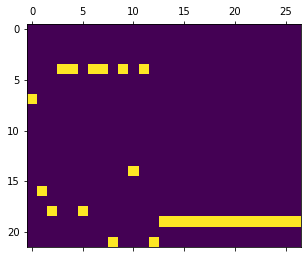

In [0]:
def vectorize(smiles):# 벡터 함수를 정의
        one_hot =  np.zeros((smiles.shape[0], embed , len(charset)),dtype=np.int8)
        # 3차원을 전부 0으로 채움. 거기다가 i번째에 1을 넣어서 하나가 1이 된거임. 나머지는 싹다 0.
        # 근데 첫번째 따로 빼놓은게 첫번째 시작할때 임베드층 0이고, !가 디코드 시작하라는 사인을 주려는 추가한 문자.
       
        for i,smile in enumerate(smiles):
            # 처음 단어를 인코딩
            one_hot[i,0,char_to_int["!"]] = 1
            # 나머지 단어를 인코딩
            for j,c in enumerate(smile):
                one_hot[i,j+1,char_to_int[c]] = 1
            # 마지막 단어를 인코딩
            one_hot[i,len(smile)+1:,char_to_int["E"]] = 1
        # 하나는 input , 다른 하나는 output으로 반환.
        return one_hot[:,0:-1,:], one_hot[:,1:,:]

X_train, Y_train = vectorize(smiles_train.values)  # 훈련 데이터를 벡터화
X_test,Y_test = vectorize(smiles_test.values) # 시험 데이터를 벡터화
print (smiles_train.iloc[0]) # iloc[0] : 0번째 행을 출력함.
plt.matshow(X_train[0].T)

각 글자별 인덱스가 노란 점으로 표시된다. 시작을 나타내는!의 인덱스는 7, 끝을 나타내는 E의 인덱는는 19이다.

In [0]:
"".join([int_to_char[idx] for idx in np.argmax(X_train[0,:,:], axis=1)])
# 훈련세트의 최대값들을 smile코드로 나타낸 것을 축하나로 문자열로 나타냄.

'!N#CC#CC1COC1EEEEEEEEEEEEEE'

In [0]:
# Keras 를 import함
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import regularizers
input_shape = X_train.shape[1:]
output_dim = Y_train.shape[-1]
latent_dim = 64 # 은닉층 : 64층
lstm_dim = 64 # LSTM층 : 64층

In [0]:
unroll = False
# RNN의 속도를 높이기 위해 False로 지정 만약 True는 데이터 양이 작을 때 사용하므로 False로 지정하였음.

encoder_inputs = Input(shape=input_shape) # 인코더에 입력

encoder = LSTM(lstm_dim, return_state=True,
                unroll=unroll)
 # 위에서 lstm_dim이 64라고했으므로 64개의 각 층이 입력SMILES 문자열을 읽는 데 사용함.

encoder_outputs, state_h, state_c = encoder(encoder_inputs)

states = Concatenate(axis=-1)([state_h, state_c])
# Concatenate : state h와 state c 를 axis = -1을 기준으로 하나로 연겨

neck = Dense(latent_dim, activation="relu")
# latent dim을 출력값의 크기로받고 활성화함수로 렐루를 사용하여 neck 부분을 Dense층으로 만듦. 

neck_outputs = neck(states)

import warnings
warnings.filterwarnings("ignore")

In [0]:
decode_h = Dense(lstm_dim, activation="relu")
decode_c = Dense(lstm_dim, activation="relu")
state_h_decoded =  decode_h(neck_outputs) # state h와 state c 에 대해 디코딩을 한 것임.
state_c_decoded =  decode_c(neck_outputs)
encoder_states = [state_h_decoded, state_c_decoded] # 인코더 아웃풋은 버리고 state_h , state_c만 유지
decoder_inputs = Input(shape=input_shape) # state_h 와 state_c를 초기상태로 사용해서 디코더를 설정.

decoder_lstm = LSTM(lstm_dim,
                    return_sequences=True,
                    unroll=unroll
                   )
#각 sequence마다 출력값을 출력. LSTM 층을 여러개로 쌓아올릴 때는 return_sequence=True 옵션을 사용.

decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)

decoder_dense = Dense(output_dim, activation='softmax') 
# Decoder 층에 마지막에 softmax 활성화함수 사용하여 확률로 변환.

decoder_outputs = decoder_dense(decoder_outputs) # 출력

# 두 위치에 대해 훈련 벡터를 입력하고 입력에 앞서 한 문자를 예측하는 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
print (model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 27, 22)]     0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 64), (None,  22272       input_2[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 128)          0           lstm_1[0][1]                     
                                                                 lstm_1[0][2]                     
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           8256        concatenate_1[0][0]          

In [0]:
from tensorflow.keras.callbacks import History, ReduceLROnPlateau
# History : 케라스는 학습시킬 때 fit함수를 사용하고 History 객체가 반환. 
# History는 이어지는 epoch 각각에서의 훈련 손실 값과 metric 값을 기록.

h = History()

rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=10, min_lr=0.000001, verbose=1, min_delta=1e-5)
 # monitor : 모니터를 할 수량. factor : 학습률이 감소하는 요인으로 우리는 0.5로 잡음.
 # patience : 학습률이 감소한 후 계산되지 않은 에폭 수 . min_lr : 학습률의 하한 
 # verbose : 1이면 진행상태 막대로 출력, 0이면 아무것도 표시되지 않음. min_delta : 새로운 최적 측정을 위한 임계값

In [0]:
from tensorflow.keras.optimizers import RMSprop, Adam
opt=Adam(lr=0.005) # 학습률 0.005로 Adam 최적화 법을 사용.

model.compile(optimizer=opt, loss='categorical_crossentropy') 
# model.compile : 모델 학습 시키기 전에 학습 방식에 대한 환경 설정.

In [0]:
import warnings
warnings.filterwarnings("ignore")

model.fit([X_train,X_train],Y_train,
                    epochs=200,
                    batch_size=256,
                    shuffle=True, # 데이터를 섞어서 1배치에 256개를 뽑아낸다.
                    callbacks=[h, rlr],  # callbacks : 특정 단계에서 적용할 함수의 세트
                    validation_data=[[X_test,X_test],Y_test ]) # 훈련 데이터와 검증 데이터를 비교.

Train on 50029 samples, validate on 16677 samples
Epoch 1/200
50029/50029 [==============================] - 16s 324us/sample - loss: 1.6724e-04 - val_loss: 6.7830e-04
Epoch 2/200
50029/50029 [==============================] - 17s 330us/sample - loss: 1.6167e-04 - val_loss: 6.9179e-04
Epoch 3/200
50029/50029 [==============================] - 17s 331us/sample - loss: 1.5783e-04 - val_loss: 6.8298e-04
Epoch 4/200
50029/50029 [==============================] - 16s 327us/sample - loss: 1.5282e-04 - val_loss: 6.7395e-04
Epoch 5/200
50029/50029 [==============================] - 17s 330us/sample - loss: 1.4986e-04 - val_loss: 6.7866e-04
Epoch 6/200
50029/50029 [==============================] - 16s 325us/sample - loss: 1.4595e-04 - val_loss: 6.7306e-04
Epoch 7/200
50029/50029 [==============================] - 16s 324us/sample - loss: 1.4287e-04 - val_loss: 6.6079e-04
Epoch 8/200
50029/50029 [==============================] - 16s 329us/sample - loss: 1.4448e-04 - val_loss: 6.8920e-04
Epoch 

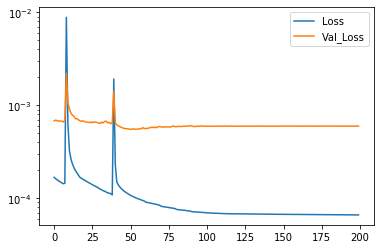

In [0]:
plt.plot(h.history["loss"], label="Loss") #감소하닥 일정해지는 경향을 보임.
plt.plot(h.history["val_loss"], label="Val_Loss")
plt.yscale("log")
plt.legend()

In [0]:
# 아래 코드는 아무것도 출력하지 않으므로 테스트 세트에서 100 개의 테스트 된 SMILES가 완벽하게 재구성됨.
for i in range(100):
    v = model.predict([X_test[i:i+1], X_test[i:i+1]]) # 모델을 시험데이터로 예측.
    idxs = np.argmax(v, axis=2) #axis=2을 기준으로 즉 z축을 기준으로 가장 큰 값의 인텍스를 반환.
    pred=  "".join([int_to_char[h] for h in idxs[0]])[:-1]
    idxs2 = np.argmax(X_test[i:i+1], axis=2)
    true =  "".join([int_to_char[k] for k in idxs2[0]])[1:]
    if true != pred: # 예측값이랑 실제 값이랑 다르다면 둘다 출력함.
       print(true, pred)

In [0]:
smiles_to_latent_model = Model(encoder_inputs, neck_outputs) # 숨어있는 모델 (은닉모델)

In [0]:
latent_input = Input(shape=(latent_dim,))
# reuse_layers : 잠재 공간과 일치하는 새로운 입력이 정의되었지만 이전의 층을 재사용하여 h(hidden) 및 c(cell) 상태를 얻을 수 있음. 
# 그렇게하면 가중치가 훈련 된 모델에서 상속.

state_h_decoded_2 =  decode_h(latent_input)
state_c_decoded_2 =  decode_c(latent_input)
latent_to_states_model = Model(latent_input, [state_h_decoded_2, state_c_decoded_2])

In [0]:
# input shape를 변화시켜야만 상태 유지가 가능.
inf_decoder_inputs = Input(batch_shape=(1, 1, input_shape[1])) ##batch_shape=1 : 한 샘플을 학습한 후 그것을 다음 샘플 학습 시에 전달.
inf_decoder_lstm = LSTM(lstm_dim,
                    return_sequences=True,
                    unroll=unroll,
                    stateful=True # 상태유지 LSTM 모델. 여기서 상태유지라는 것은 현재 학습된 상태가 다음 학습시 초기 상태로 전달된다는 것을 의미.
                   )  # 마지막 샘플 학습을 마치고, 새로운 에포크 수행 시에는 새로운 샘플 학습을 해야하므로 상태 초기화 필요.
inf_decoder_outputs = inf_decoder_lstm(inf_decoder_inputs)
inf_decoder_dense = Dense(output_dim, activation='softmax') # 마지막 출력할 때는 소프트맥스 함수로 확률로 변환시킴.
inf_decoder_outputs = inf_decoder_dense(inf_decoder_outputs)
sample_model = Model(inf_decoder_inputs, inf_decoder_outputs)

In [0]:
#Transfer Weights : 디코더 모델을 정의한 후 학습 된 자동 인코더 모델에서 해당 가중치가 전송됨.
for i in range(1,3):
    sample_model.layers[i].set_weights(model.layers[i+6].get_weights())
    # set weight : 모델 가중치 값을 넘파이 배열리스트로부터 설정한 것.
    # layer : 모델을 구성하는 층들이 저장된 1차원 리스트.  
    # get weight : 모델가중치 텐서들이 넘파이 배열로 저장된 1차원 리스트.

In [0]:
sample_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(1, 1, 22)]              0         
_________________________________________________________________
lstm_3 (LSTM)                (1, 1, 64)                22272     
_________________________________________________________________
dense_5 (Dense)              (1, 1, 22)                1430      
Total params: 23,702
Trainable params: 23,702
Non-trainable params: 0
_________________________________________________________________


In [0]:
x_latent = smiles_to_latent_model.predict(X_test)
# 잠재 모델에 대한 SMILES은 잠재 공간과 같은 SMILES를 fingerprint로 인코딩하는데 사용할 수 있음.

[    5 15472  5247 15039  1075  5251  1243  3991 10569  5891]
45051       COCc1cocn1
45061       COCc1conn1
45055    COCc1c[nH]nn1
45069       COCc1ncon1
44668    COCc1cnn[nH]1
44751       COCc1ncno1
45007       COCc1ccoc1
44727       COCc1cnno1
Name: smiles, dtype: object


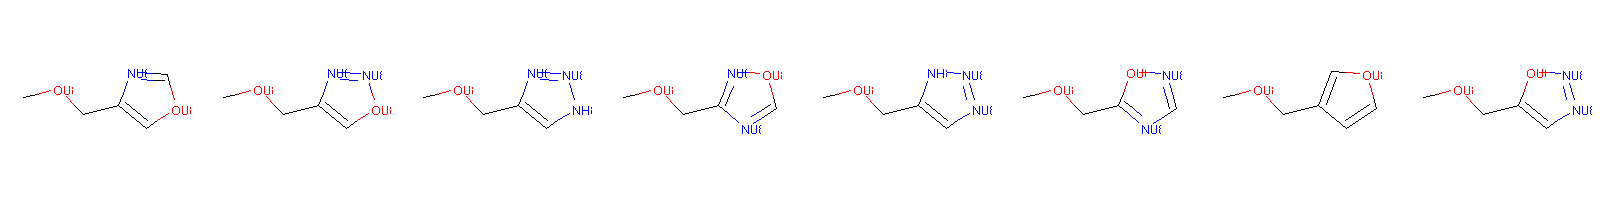

In [0]:
# 비슷한 분자들은 비슷한 fingerprint를 만든다. 숨겨진 공간에서 비슷한 분자들이 비슷한 벡터들을 만드는 것을 보기 위해서 비슷한 분자들에 대한 간단한 검색의 수행. 
# 숨겨진 벡터간의 절대값의 차이는 행렬의 유사성을 이용한다. 이 테스트는 빠르게 수행될 수 있음.
# 여기서 분자 구조가 비슷한 분자들은 물성이 비슷하다는 과학적인 지식에서 출발한 개념이다.

molno = 5 # molno는 원자가 전자수를 의미.
latent_mol = smiles_to_latent_model.predict(X_test[molno:molno+1])
sorti = np.argsort(np.sum(np.abs(x_latent - latent_mol), axis=1)) # 축 하나로 정렬.
print(sorti[0:10]) # 인덱스 값이 0 ~9까지 정렬 후 출력.
print(smiles_test.iloc[sorti[0:8]]) # 검증 데이터에서 인덱스 값이 0~7인 데이터를 출력.
Draw.MolsToImage(smiles_test.iloc[sorti[0:8]].apply(Chem.MolFromSmiles)) # 0~7번째들을 분자구조식으로 출력. 분자구조가 유사함.


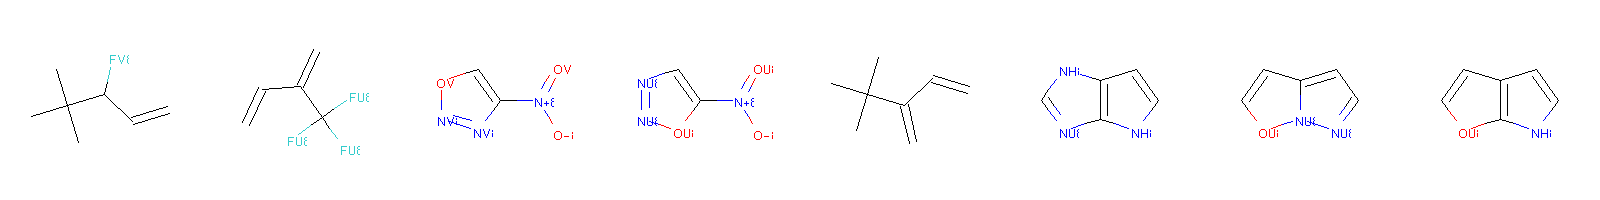

In [0]:
Draw.MolsToImage(smiles_test.iloc[sorti[-8:]].apply(Chem.MolFromSmiles)) # 뒤에서 8번째까지 분자구조식 출력. 분자의 구조의 차이가 가장 크다.

In [0]:
# 이온화되지 않은 화합물의 농도 비율을 logP라 한다. 분배계수(Partition-coefficient)는 섞이지 않는 2종류의 용매 혼합물에 화합물을 섞고 평형상태가 이루어졌을 때 각 용매에서의 화합물 농도 비율을 의미한다.
# Octanol과 물에 대한 화합물의 분배계수를 통해 지질친화도를 평가할 수 있기 때문에 신약개발에서 중요하게 보는 물리화학적 성질이다. 
# 농도 비율에 log를 취한 값을 보통 사용하는데, 이온화 되지 않은 화합물의 농도 비율을 logP라 한다.

logp = smiles_test.apply(Chem.MolFromSmiles).apply(Descriptors.MolLogP)

[0.29783806 0.19292198] 0.49076003


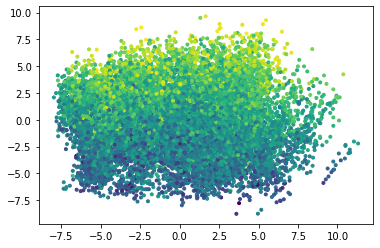

In [0]:
# 사이킷런 import
from sklearn.decomposition import PCA
# PCA 를 이용해서 쉽게 차원을 축소시키고, 새로 만들어진 데이터로 dataframe 을 만듦.

pca = PCA(n_components = 2)
red = pca.fit_transform(x_latent) # 특징행렬을 낮은 차원의 근사행렬로 변화.
plt.figure()
plt.scatter(red[:,0], red[:,1],marker='.', c= logp) # logP에 대해 그래프 도시.
print(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))

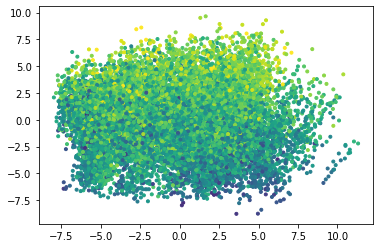

In [0]:
molwt = smiles_test.apply(Chem.MolFromSmiles).apply(Descriptors.MolMR) # 분자량에 따른 특성 분포.
plt.figure()
plt.scatter(red[:,0], red[:,1],marker='.', c= molwt)  # molwt에 대해 그래프 도시.

QSAR은 Quantitative Structure Activity Relationship의 약어로서, 물질이 가지고 있는 화학 구조를 이용하여 물성 혹은 독성을 계산하는 방법입니다. 데이터를 훈련하여 predicted logP와 experimental logP에 대한 그래프를 그리면 아래와 같습니다.

![대체 텍스트](https://www.molinspiration.com/services/logp.png)

따라서 QSAR모델 사용하여 분자 구조 유사성 판단에 사용했습니다.

In [0]:
 # QSAR 모델를 기초로 잘 작동하는지 확인.
x_train_latent = smiles_to_latent_model.predict(X_train) # 은닉 모델을 예측.
logp_train = smiles_train.apply(Chem.MolFromSmiles).apply(Descriptors.MolLogP)  # logP를 가지고 만든 훈련데이터셋.

In [0]:
from tensorflow.keras.models import Sequential # Sequential 모델을 import.
logp_model = Sequential()
logp_model.add(Dense(128, input_shape=(latent_dim,), activation="relu"))
logp_model.add(Dense(128, activation="relu"))
logp_model.add(Dense(1))
logp_model.compile(optimizer="adam", loss="mse")

In [0]:
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=10, min_lr=0.000001, verbose=1, min_dalta=1e-5)
#학습률을 최소 0.000001까지 줄임.

logp_model.fit(x_train_latent, logp_train, batch_size=128, epochs=200, callbacks = [rlr])

Train on 50029 samples
Epoch 1/200
50029/50029 [==============================] - 1s 24us/sample - loss: 0.2816
Epoch 2/200
50029/50029 [==============================] - 1s 17us/sample - loss: 0.2018
Epoch 3/200
50029/50029 [==============================] - 1s 17us/sample - loss: 0.1844
Epoch 4/200
50029/50029 [==============================] - 1s 17us/sample - loss: 0.1746
Epoch 5/200
50029/50029 [==============================] - 1s 17us/sample - loss: 0.1666
Epoch 6/200
50029/50029 [==============================] - 1s 17us/sample - loss: 0.1590
Epoch 7/200
50029/50029 [==============================] - 1s 16us/sample - loss: 0.1532
Epoch 8/200
50029/50029 [==============================] - 1s 17us/sample - loss: 0.1480
Epoch 9/200
50029/50029 [==============================] - 1s 17us/sample - loss: 0.1452
Epoch 10/200
50029/50029 [==============================] - 1s 17us/sample - loss: 0.1408
Epoch 11/200
50029/50029 [==============================] - 1s 17us/sample - loss: 0.1

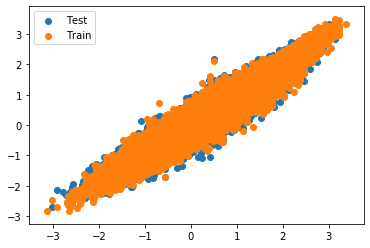

In [0]:
logp_pred_train = logp_model.predict(x_train_latent) # 은닉 모델을 예측한 값. QSAR모델 그래프와 비슷.
logp_pred_test = logp_model.predict(x_latent)
plt.scatter(logp, logp_pred_test, label="Test")
plt.scatter(logp_train, logp_pred_train, label="Train")
plt.legend()

In [0]:
# 은닉공간에서 스마일을 샘플링하려면 두단계가 필요하다. 그래서 latent_to_smiles 정의.
def latent_to_smiles(latent):
   # 디코더 LSTM 네트워크의 초기 상태를 설정.
    states = latent_to_states_model.predict(latent) # states는 latnet_to_states 모델로 예측한 값.
    sample_model.layers[1].reset_states(states=[states[0],states[1]])
     # 상태유지를 하기 때문에 그 layer에서 reset. 이경우에서는 2층을 reset.

    # input char 준비.
    startidx = char_to_int["!"]
    samplevec = np.zeros((1,1,22))
    samplevec[0,0,startidx] = 1
    smiles = ""

    # 입력 문자 벡터가 입력되고 끝 문자 "E" 가 나올 때 까지 반복적으로 샘플링.
    for i in range(28):
        o = sample_model.predict(samplevec)
        sampleidx = np.argmax(o)
        samplechar = int_to_char[sampleidx]
        if samplechar != "E":
            smiles = smiles + int_to_char[sampleidx]
            samplevec = np.zeros((1,1,22)) # (1,1,22)는 stateful을 위해 reshape한 input의 형태.
            samplevec[0,0,sampleidx] = 1
        else:
            break
    return smiles

In [0]:
smiles = latent_to_smiles(x_latent[0:1])
print(smiles)
print(smiles_test.iloc[0]) # 테스트 샘플 출력.

NCCC1OC=NO1
NCCC1OC=NO1


In [0]:
# sampling을 했을 때 실제 데이터와 일치하지 않는 갯수를 구하기 위해 다음과 같이 실행.
wrong = 0
for i in range(1000):
    smiles = latent_to_smiles(x_latent[i:i+1])
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        pass
    else: # 잘못된 구조 출력.
        print(smiles)
        wrong = wrong + 1
print ("%0.1F percent wrongly formatted smiles"%(wrong/float(1000)*100))

c1[nH]c2Cc(=O)n2[nH]1
N=C1NOC2(CC1)N2
0.2 percent wrongly formatted smiles


FCC1=NOCCO
FCC1=NOCCO
FCC1=NOCCO


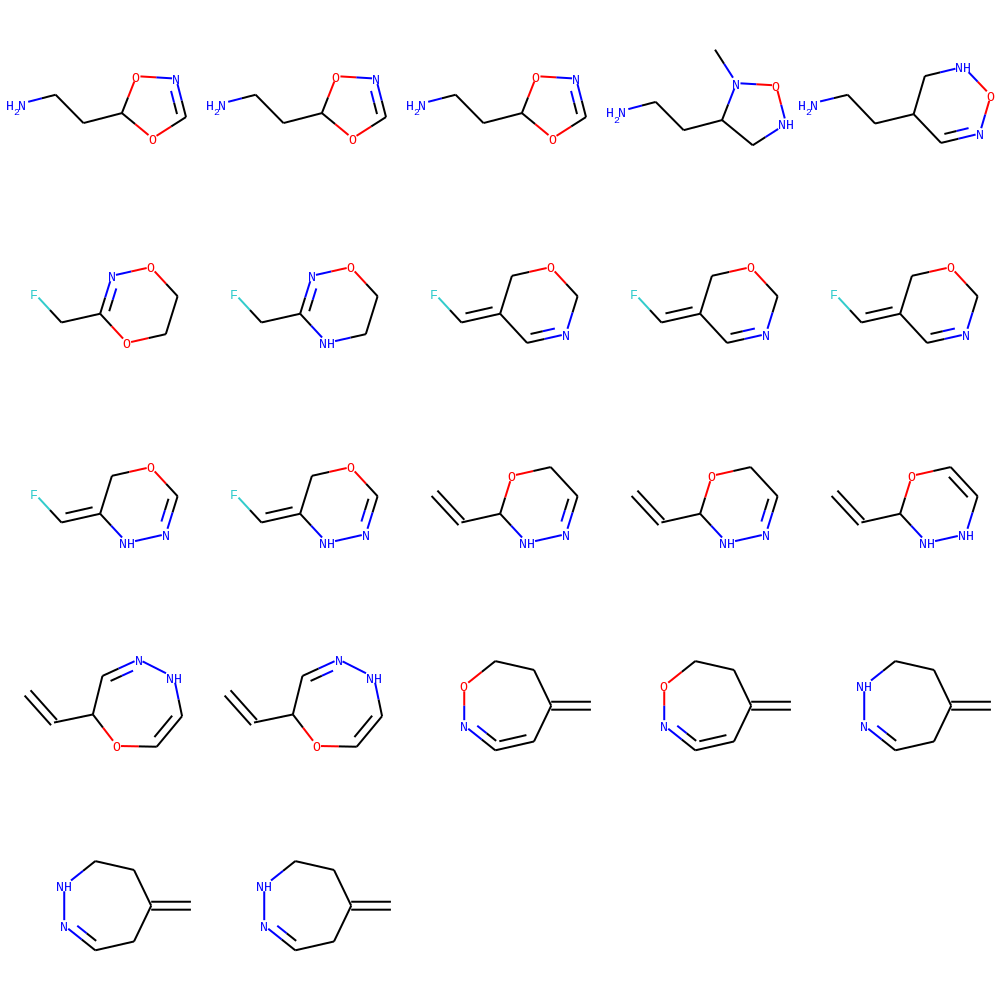

In [0]:
# latent_space 에서 선형보간법 : latent_space에서 분자가 보간될 수 있는지 확인.
i = 0
j= 2
latent1 = x_latent[j:j+1]
latent0 = x_latent[i:i+1]
mols1 = []
ratios = np.linspace(0,1,25)
for r in ratios:
    #print r
    rlatent = (1.0-r)*latent0 + r*latent1 # interpolation 한 것.
    smiles  = latent_to_smiles(rlatent)
    mol = Chem.MolFromSmiles(smiles,sanitize=False)
    if mol: # interpolation한 값이 실제와 일치하면 mols1에 추가. 일치하지 않으면 smiles를 출력.
        mols1.append(mol)
    else:
        print(smiles)
Draw.MolsToGridImage(mols1, molsPerRow=5)
#비슷한 구조를 가지고 있는 분자들이 근접하게 위치함.

OCCC1=NOCO
NCCC=OC1CO1
N#CCC1ON=N=N1
NCCC1CNO=C1
NCCCO1CCO1


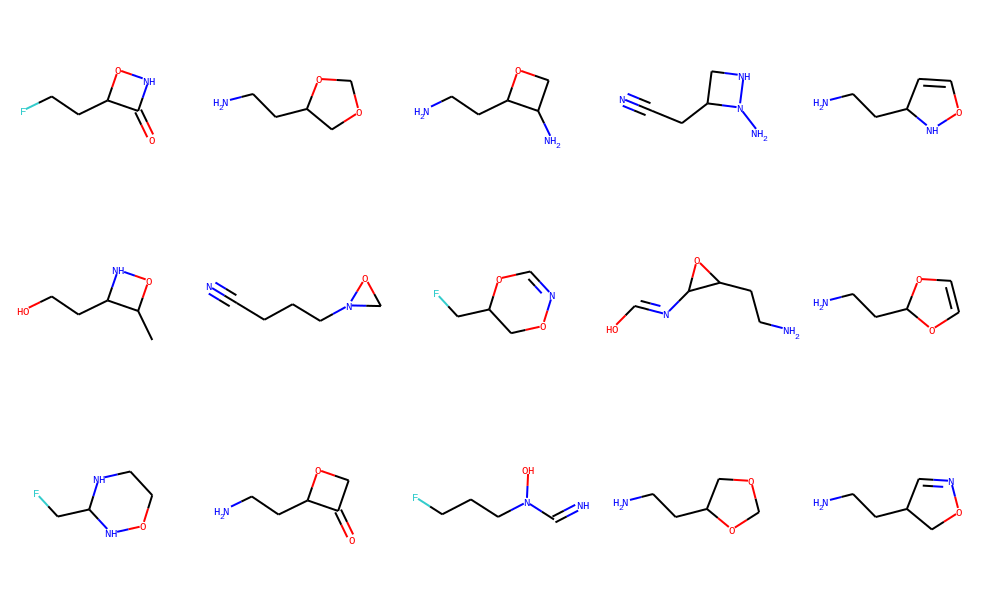

In [0]:
# 은닉벡터 주위의 샘플링을 하면 분자구조가 위의 방법보다 더 유사.
latent = x_latent[0:1]
scale = 0.40
mols = []
for i in range(20):
    latent_r = latent + scale*(np.random.randn(latent.shape[1])) 
    smiles = latent_to_smiles(latent_r)
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mols.append(mol)
    else:
        print(smiles)
Draw.MolsToGridImage(mols, molsPerRow=5)

## 3. 결론 
LSTM을 기반으로 인코더를 만들고 교사 강요를 통해 훈련시키는 과정을 수행했습니다.

### **참고문헌**
- ZhengXu외3명,『Seq2seqFingerprint:AnUnsupervisedDeepMolecular EmbeddingforDrugDiscovery 』, August 20–23, 2017
- [SMILES_1](https://www.daylight.com/dayhtml_tutorials/languages/smiles/index.html)
- [SMILES_2](https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html)
- [Data set : GDB11](http://gdb.unibe.ch/downloads/)
- [딥 러닝을 이용한 자연어 처리 입문](https://wikidocs.net/book/2155)
- 사이토 고키, 『밑바닥부터 시작하는 딥러닝』, 한빛미디어, 2017
- 오렐리앙 제롱, 『핸즈 온 머신러닝』, 한빛미디어, 2018
- 톰 호프, 예헤즈켈 레셰프, 이타이 리더, 『러닝 텐서플로』, 한빛미디어, 2018
- 사이토 고키, 『밑바닥부터 시작하는 딥러닝 2』, 한빛미디어, 2019
- 안드레아스 뮐러, 세라 가이도, 『파이썬 라이브러리를 이용한 머신러닝』, 한빛미디어, 2017
- 니킬 부두마, 『딥러닝의 정석』, 한빛미디어, 2018
- 프랑소와 숄레, 『케라스 창시자에게 배우는 딥러닝』, 길벗, 2018
- 안토니오 걸리, 수짓 팔, 『케라스로 구현하는 딥러닝과 강화학습』, 에이콘, 2018
- 세바스찬 라시카, 바히드 미자리리『머신러닝 교과서 with 파이썬, 사이킷런, 텐서플로』, 길벗, 2019
- 솔라리스, 『텐서플로로 배우는 딥러닝』, 영진닷컴, 2018 
- 박해선, 『정직하게 코딩하며 배우는 딥러닝 입문』, 이지스 퍼블리싱, 2019
- 전창욱, 최태균, 조중현, 『텐서플로와 머신러닝으로 시작하는 자연어 처리』, 위키북스, 2019
- 정가인, 『G protein-coupled receptor 구조 연구의 현재와 미래』, 2012
- 최병철, 『표적치료제의 모든 것 소분자 키나제 억제제』
- 박철승, 『이온채널과 신약개발』
- J. Chem. Inf. Model, 『Virtual Exploration of the Chemical Universe up to 11 Atoms of C, N, O, F: Assembly of 26.4 Million Structures (110.9 Million Stereoisomers) and Analysis for New Ring Systems, Stereochemistry, Physicochemical Properties, Compound Classes, and Drug Discovery』, 2007,47,342-353